IMPORTING REQUIREMENTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io

READING DATASET

In [2]:
dataset=pd.read_csv('/content/SampleSuperstore.csv')
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


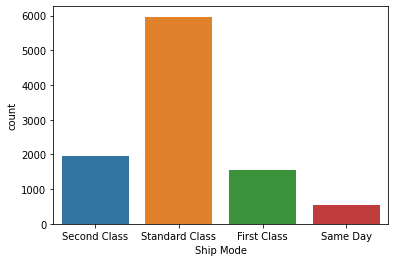

In [5]:
sns.countplot(dataset['Ship Mode'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


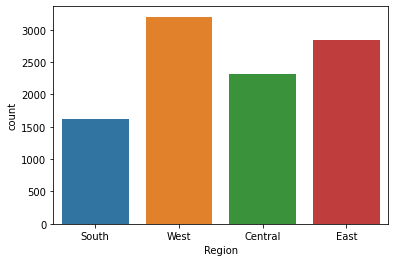

In [6]:
sns.countplot(dataset['Region'])

In [7]:
dataset['Category'].count()

9994

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


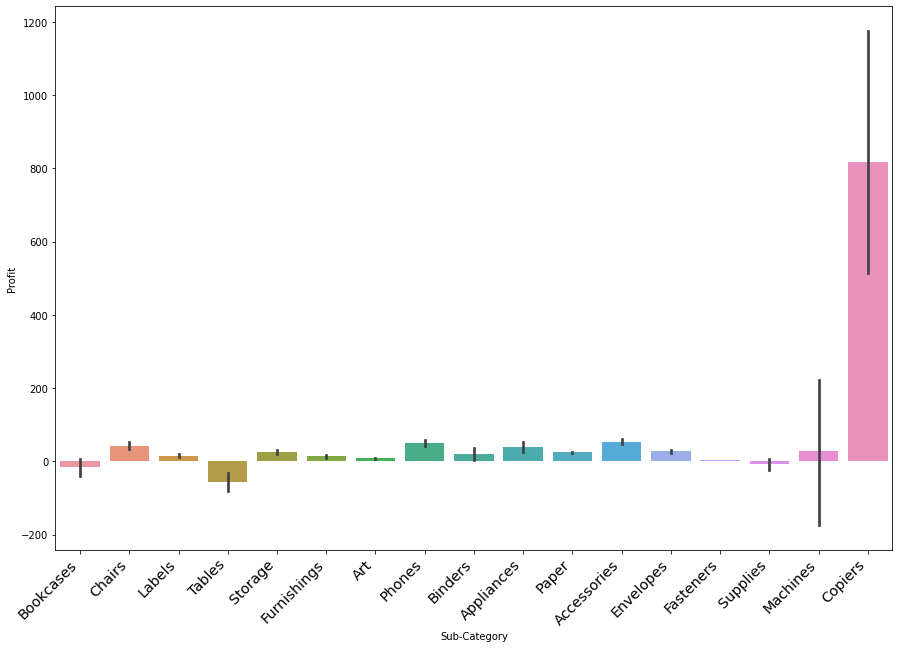

In [13]:
plt.figure(figsize=(15,10))
a=sns.barplot(dataset['Sub-Category'],dataset['Profit'],data=dataset)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


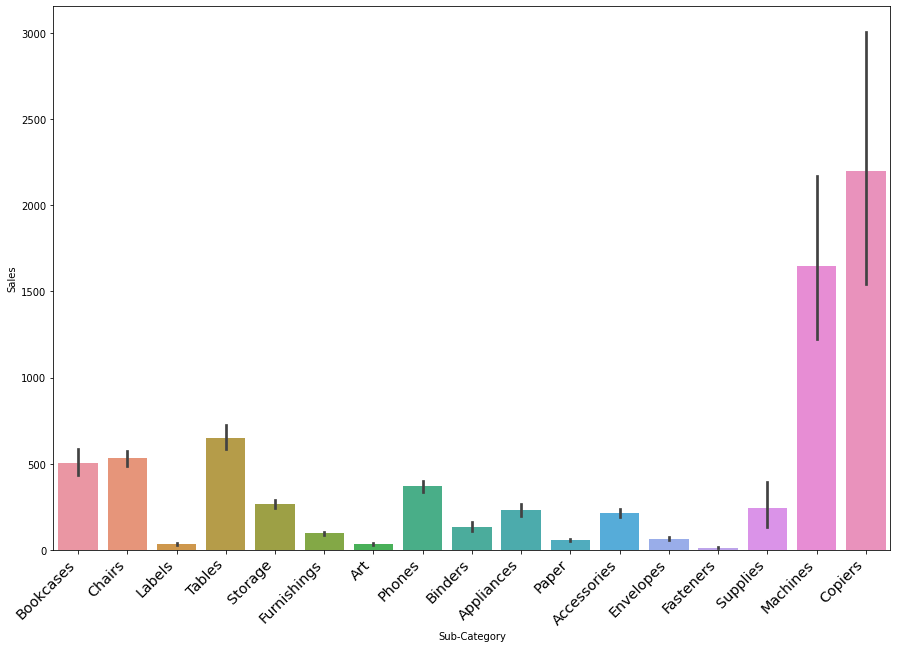

In [14]:
plt.figure(figsize=(15,10))
a=sns.barplot(dataset['Sub-Category'],dataset['Sales'],data=dataset)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

In [16]:
cities=np.array(dataset['City'])
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [17]:
d1=pd.DataFrame()
d1=dataset.iloc[:,-5:]
d1

,Sub-Category,Sales,Quantity,Discount,Profit
0,Bookcases,261.9600,2,0.00,41.9136
1,Chairs,731.9400,3,0.00,219.5820
2,Labels,14.6200,2,0.00,6.8714
3,Tables,957.5775,5,0.45,-383.0310
4,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...
9989,Furnishings,25.2480,3,0.20,4.1028
9990,Furnishings,91.9600,2,0.00,15.6332
9991,Phones,258.5760,2,0.20,19.3932
9992,Paper,29.6000,4,0.00,13.3200


In [18]:
d1.drop('Sales',axis=1)

,Sub-Category,Quantity,Discount,Profit
0,Bookcases,2,0.00,41.9136
1,Chairs,3,0.00,219.5820
2,Labels,2,0.00,6.8714
3,Tables,5,0.45,-383.0310
4,Storage,2,0.20,2.5164
...,...,...,...,...
9989,Furnishings,3,0.20,4.1028
9990,Furnishings,2,0.00,15.6332
9991,Phones,2,0.20,19.3932
9992,Paper,4,0.00,13.3200


In [20]:
d1['state']=dataset['State']
d1.drop('Discount',axis=1)

,Sub-Category,Sales,Quantity,Profit,state
0,Bookcases,261.9600,2,41.9136,Kentucky
1,Chairs,731.9400,3,219.5820,Kentucky
2,Labels,14.6200,2,6.8714,California
3,Tables,957.5775,5,-383.0310,Florida
4,Storage,22.3680,2,2.5164,Florida
...,...,...,...,...,...
9989,Furnishings,25.2480,3,4.1028,Florida
9990,Furnishings,91.9600,2,15.6332,California
9991,Phones,258.5760,2,19.3932,California
9992,Paper,29.6000,4,13.3200,California


In [21]:
Data=d1.drop('Discount',axis=1)
Data

,Sub-Category,Sales,Quantity,Profit,state
0,Bookcases,261.9600,2,41.9136,Kentucky
1,Chairs,731.9400,3,219.5820,Kentucky
2,Labels,14.6200,2,6.8714,California
3,Tables,957.5775,5,-383.0310,Florida
4,Storage,22.3680,2,2.5164,Florida
...,...,...,...,...,...
9989,Furnishings,25.2480,3,4.1028,Florida
9990,Furnishings,91.9600,2,15.6332,California
9991,Phones,258.5760,2,19.3932,California
9992,Paper,29.6000,4,13.3200,California


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 90.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 98.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 95.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 93.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 96.4% of the points cannot be placed; y

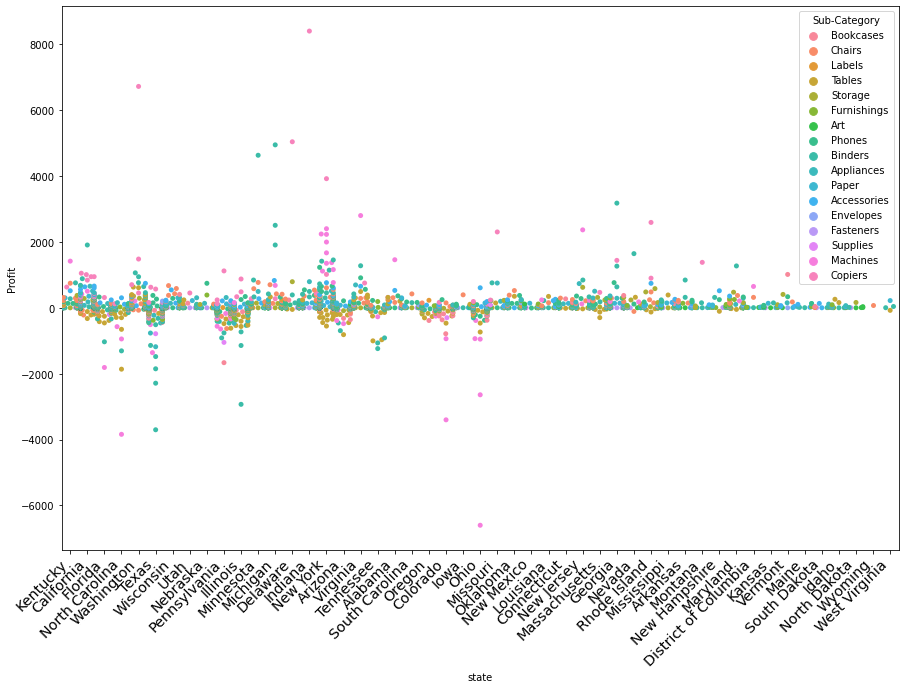

In [23]:
plt.figure(figsize=(15,10))
b= sns.swarmplot(data=d1, x="state", y="Profit", hue="Sub-Category")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()